In [2]:
import sys
sys.path.insert(0, '../../utils')
import pandas as pd
import Purity_Measure as pm
import Concurrence_Measure as cm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Engineered
tf.Tensor(0.6796140629180798, shape=(), dtype=float64)
HS-Haar
tf.Tensor(0.573237662176368, shape=(), dtype=float64)
Z
tf.Tensor(0.6796140629180798, shape=(), dtype=float64)
Engineered
HS-Haar
Z


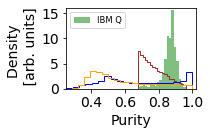

In [4]:
purity_list = []
concurrence_list = []
# alpha_values = ['HS-Haar', 0.8, 0.3, 0.1, 'Z']#np.round(np.arange(0.1, 1., 0.1), 2)
alpha_values = ['Engineered', 'HS-Haar', 'Z']  # 0.8, 0.3, 0.1, 'Z']#np.round(np.arange(0.1, 1., 0.1), 2)
for alpha in alpha_values:
    print(alpha)
    if alpha == 'HS-Haar':
        tomo, tau, dm = pd.read_pickle('../../data/HS_Haar_tomo_tau_dm_30000_qs_2.pickle')
    elif alpha == 'Z':
        tomo, tau, dm = pd.read_pickle('../../data/Brian_tomo_tau_dm_50K_point_IBMQMIN.pickle')
    elif alpha == 'Engineered':
        con_list, pur_list = pd.read_pickle(f'../../brute_force_distro_gen/plots/con_list_pur_list_choice_k_fit.pickle')
        purity_list.append(pur_list)
        concurrence_list.append(con_list)
    else:
        tomo, tau, dm = pd.read_pickle(f'../../data/MA_tomo_tau_dm_30000_qs_2_alpha_{alpha}.pickle')
    try:
        purity = pm.purity(dm)
        purity_list.append(purity)
        conc = cm.concurrence(dm)
        concurrence_list.append(conc)
        mean_purity = tf.math.reduce_mean(purity)
        print(mean_purity)
    except:
        pass

tomo_test, dm_test, dm_mle = pd.read_pickle(f'../../../IBMQ/test_data/testdata_qubit_size_2.pkl')
con = cm.concurrence(dm_mle)
purity = pm.purity(dm_mle)
purity = purity
# print (purity)

fs = 14
# print(purity_list)
# colors = ['b', 'c', 'm', 'y', 'orange']
colors = ['brown', 'b', 'orange']
for i in range(len(alpha_values)):
    print(alpha_values[i])
    if alpha_values[i] == 'Engineered':
        plt.hist(purity_list[i][2], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  #, label=f'{alpha_values[i]}')
    elif alpha_values[i] == 'HS-Haar':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  #, label=f'{alpha_values[i]}')
    elif alpha_values[i] == 'Z':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  #, label=f'{alpha_values[i]}')
    else:
        print('not found')

    # else:
    #     plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1, color=colors[i], label=fr'$\alpha$={alpha_values[i]}')
plt.hist(purity, 20, density=True, color='g', alpha=.5, label='IBM Q')
plt.xlabel('Purity', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Density \n [arb. units]', fontsize=fs)
plt.axis([0.25, 1.02, 0, 16])
plt.legend(fontsize='small')
# plt.grid(alpha=0.2)
plt.subplots_adjust(bottom=0.6, left=0.6)
# plt.savefig('histo_alpha_purity.svg', dpi=600)
# plt.savefig('histo_alpha.png', dpi=600)
plt.show()

Engineered
HS-Haar
Z


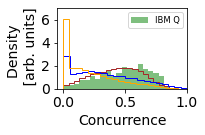

In [5]:
for i in range(len(alpha_values)):
    print(alpha_values[i])
    if alpha_values[i] == 'Engineered':
        plt.hist(concurrence_list[i][2], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  #, label=f'{alpha_values[i]}')
    elif alpha_values[i] == 'HS-Haar':
        plt.hist(concurrence_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  #, label=f'{alpha_values[i]}')
    elif alpha_values[i] == 'Z':
        plt.hist(concurrence_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  #, label=f'{alpha_values[i]}')
    else:
        print('not found')

    # else:
    #     plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1, color=colors[i], label=fr'$\alpha$={alpha_values[i]}')
plt.hist(con, 20, density=True, color='g', alpha=.5, label='IBM Q')
plt.xlabel('Concurrence', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Density \n [arb. units]', fontsize=fs)
plt.axis([-0.05, 1., 0, 7])
plt.legend(fontsize='small')
# plt.grid(alpha=0.2)
plt.subplots_adjust(bottom=0.6, left=0.6)
# plt.savefig('histo_alpha_conc.svg', dpi=600)
# plt.savefig('histo_alpha.png', dpi=600)
plt.show()